In [47]:
from simulation import *
from aesthetics import *
from scipy import stats

In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Diffusion theory

In general, this relationship is generally valid:
$$
\langle x^2 \rangle = dDt
$$
where $x$ is the position, $d$ is the dimensionality factor, $D$ is the diffusion coefficient, and $t$ is time over which the mean squared displacment is averaged. In our case, we have an angle $\theta$ instead of a position and the angle is periodic, so we must unroll it. The angle moves only in one dimension, so $d = 2$ and I'm going to write the time interval explicitly as $t + \tau$. So we define the MSD as:
$$
\text{MSD} \equiv \langle \left( \theta(t + \tau) - \theta(t) \right)^{2} \rangle = 2D \tau.
$$

# Part 1: unroll the angle measurements

We keep track of two things: first, the distance (in angular space) between adjacent measurements and second, the number of times we perform a full cycle in either direction (flips and flops).

In [49]:
# data = np.genfromtxt('butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')
prefix = '/home/dslochower/data/projects/nonequilibrium/'
data = np.genfromtxt(prefix + '/md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording-v2/cccc.dat')
distances = np.diff(data[:, 1])

In [50]:
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
print(len(flips))
print(len(flops))

17216
17287


Here there were 9012 rotations from negative to positive (CCW, I believe) and 9014 rotations from positive to negative (CW). We expect these to be equal because the torsion is undergo *free* diffusion with no biasing potential. Previously, we've verified that the probability of being in any bin (at any angle) is equal.

This is what the negative to positive flip looks like before unrolling th data.

In [51]:
print(data[flips[0] - 1, 1])
print(data[flips[0], 1])
print(data[flips[0] + 1, 1])
print(data[flips[0] + 2, 1])

-175.3009
-176.4237
179.2425
171.9868


After the angle has rotated through a full cycle (e.g., passing from $-180^\circ$ to $+180^\circ$) we add (or subtract) $360^\circ$ from the following measurements. 

In [52]:
unwrapped_data = np.copy(data)
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360

In [53]:
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360

Here is the same data as above, but unrolled. Notice the discontinuity (change of sign) is no longer there.
Also note that the -164 has changed to +195 (a difference of 360).

In [54]:
print(unwrapped_data[flips[0] - 1, 1])
print(unwrapped_data[flips[0], 1])
print(unwrapped_data[flips[0] + 1, 1])
print(unwrapped_data[flips[0] + 2, 1])

184.6991
183.5763
179.2425
171.9868


Now let's compare the *raw* data and the unrolled data. It's impossible to look at the raw data because the angle is fluctuating so wildly, so I'm only plotting every 10,000 data point!

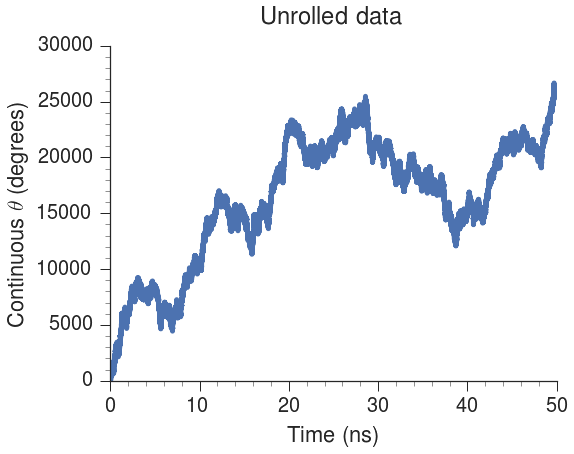

In [55]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# fig.subplots_adjust(wspace=0.4)
# ax1.plot(range(1, len(data[:, 1]), 10000), data[::10000, 1])
# ax1.set_title('Raw data', y=1.05)
# ax1.set_ylabel(r'$\theta$ (degrees)')
# ax1.set_xlabel('Time (frames)')

fig, ax2 = plt.subplots(1, 1, figsize=(8, 6))
ax2.plot([i*10*1e-6 for i in range(len(unwrapped_data))], unwrapped_data[:, 1])
ax2.set_title('Unrolled data', y=1.05)
ax2.set_ylabel(r'Continuous $\theta$ (degrees)')
ax2.set_xlabel('Time (ns)')

pretty_plot(fig)

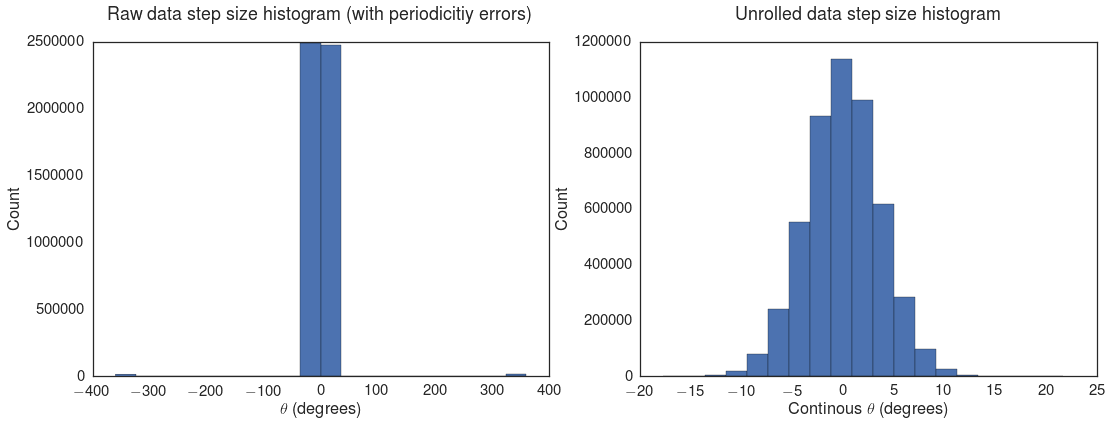

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.hist(np.diff(data[:, 1]), bins=20)
ax1.set_title('Raw data step size histogram (with periodicitiy errors)', y=1.05)
ax1.set_ylabel('Count')
ax1.set_xlabel(r'$\theta$ (degrees)')

ax2.hist(np.diff(unwrapped_data[:, 1]), bins=20)
ax2.set_title('Unrolled data step size histogram', y=1.05)
ax2.set_ylabel('Count')
ax2.set_xlabel(r'Continous $\theta$ (degrees)')


# Part 2: calculate the mean squared displacement for each time interval $\tau$ using the unrolled data

In [57]:
unwrapped_positions = unwrapped_data[:, 1]

In [58]:
def compute_msd(trajectory, delta):
    ''' For a given time interval, compute the displacements of the angle. For small time deltas,
    there are many displacements in the trajectory. As the delta gets bigger, there are fewer
    and fewer displacements.'''
    number_measurements = len(trajectory) - delta
    print('Computing mean of {} measurements'.format(number_measurements))
    displacements = np.empty((number_measurements))
    for time in range(number_measurements):
        displacements[time] = trajectory[time + delta] - trajectory[time]
    return np.mean(displacements**2), stats.sem(displacements**2)

In [59]:
delays = np.arange(10000, len(unwrapped_positions) - 1, 10000)
MSDs = np.empty((len(delays)))
SEMs = np.empty((len(delays)))
for delay in delays:
    MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)

Computing mean of 4990000 measurements
Computing mean of 4980000 measurements
Computing mean of 4970000 measurements
Computing mean of 4960000 measurements
Computing mean of 4950000 measurements
Computing mean of 4940000 measurements
Computing mean of 4930000 measurements
Computing mean of 4920000 measurements
Computing mean of 4910000 measurements
Computing mean of 4900000 measurements
Computing mean of 4890000 measurements
Computing mean of 4880000 measurements
Computing mean of 4870000 measurements
Computing mean of 4860000 measurements
Computing mean of 4850000 measurements
Computing mean of 4840000 measurements
Computing mean of 4830000 measurements
Computing mean of 4820000 measurements
Computing mean of 4810000 measurements
Computing mean of 4800000 measurements
Computing mean of 4790000 measurements
Computing mean of 4780000 measurements
Computing mean of 4770000 measurements
Computing mean of 4760000 measurements
Computing mean of 4750000 measurements
Computing mean of 4740000

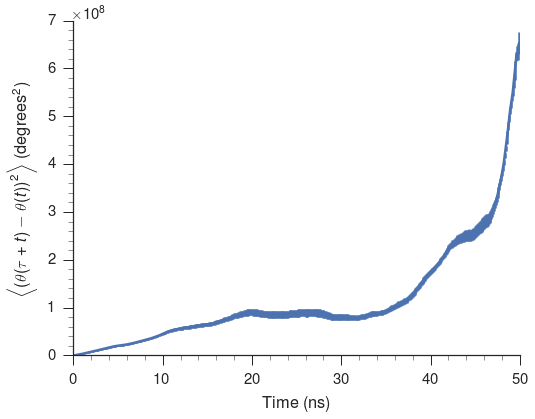

In [60]:
times = delays * 10**-5
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.errorbar(times, MSDs, yerr=100*SEMs)
ax1.set_ylabel(r'$\left\langle \left(\theta(\tau + t) - \theta(t) \right) ^2 \right\rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time (ns)')
pretty_plot(fig, scientific=False)

3.13e+06 +/- 1.06e+05


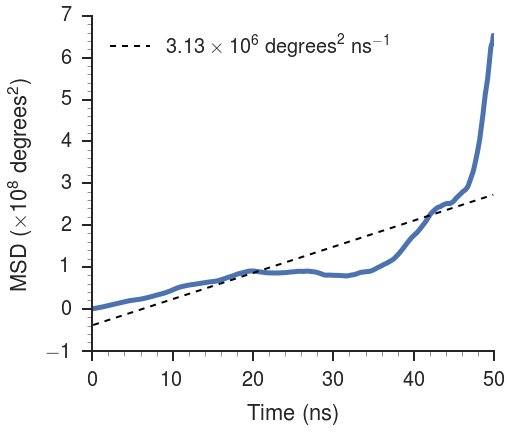

In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(times,
                                                               MSDs)
print('{0:2.2e} +/- {1:2.2e}'.format(slope / 2, std_err / 2))

times = delays * 10**-5
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
ax1.plot(times, MSDs / 1e8)
ax1.plot(times, (times * slope + intercept) / 1e8, c='k', ls='--', lw=2, 
                 label=r'${0:0.3g} \times 10^{{6}} \text{{ degrees}}^2 \text{{ ns}}^{{-1}}$'.format(slope / 2 / 1e6))

ax1.set_ylabel(r'MSD ($\times 10^{8}$ degrees$^2$)')
ax1.set_xlabel(r'Time (ns)')
ax1.legend(loc=2)
aesthetics.paper_plot(fig, scientific=False)

When plotting $\langle \theta(\tau)^2 \rangle$, the slope of the plots (on the left) should be $2D$ yet cleary they are not linear. It's typical to take the middle 80% of the data to calculate the slope, because the statistics are nosiy when the time dela is a very large part or very small part of the trajectory.

In [44]:
ten_percent = 0.1*len(delays)
ninety_percent = 0.9*len(delays)
slope, intercept, r_value, p_value, std_err = stats.linregress(delays[ten_percent:ninety_percent]*10**-14,
                                                               MSDs[ten_percent:ninety_percent])


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


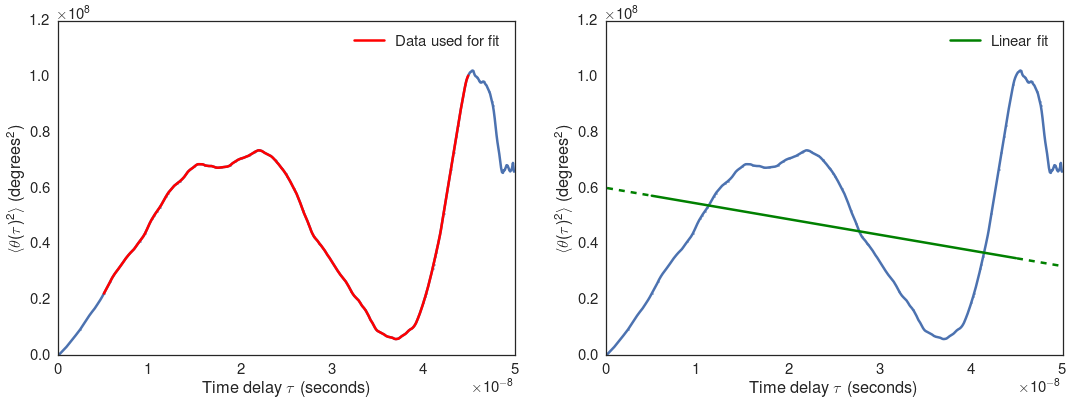

In [45]:
# Femtosecond is 10**-15
# Each frame is 10 fs = 10**-14
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax1.plot(delays[ten_percent:ninety_percent]*10**-14, MSDs[ten_percent:ninety_percent], c='r', label='Data used for fit')
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (seconds)')
ax1.legend()

ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax2.plot(delays[ten_percent:ninety_percent]*10**-14, slope*delays[ten_percent:ninety_percent]*10**-14+intercept, c='g', ls='-', label='Linear fit')
ax2.plot(delays[0:ten_percent]*10**-14, slope*delays[0:ten_percent]*10**-14+intercept, c='g', ls='--')
ax2.plot(delays[ninety_percent:]*10**-14, slope*delays[ninety_percent:]*10**-14+intercept, c='g', ls='--')
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (seconds)')
ax2.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2.xaxis.major.formatter._useMathText = True
ax2.legend()


In [46]:
print(slope)
print(slope/2)

-5.61100568547e+14
-2.80550284274e+14


We have $5.4 \times 10^{13}$ (degrees$^2$/second) = $2D$, so D = $2.7 \times 10^{13}$ (degrees$^2$/second). This is not that much smaller than `C_intrasurface`!

From the other notebook, we determined the probability to go left (or right) into another bin (6 degrees) in 10 fs is 0.2143 (0.5446 to stay in the same bin). Thus, we wrote:
$$
\Delta P_i = -2C \Delta t
(1 - 0.5446) = -2C(1 \times 10^{-14} \text{second})
C = 2.28 \times 10^{13} \text{second}^{-1}
$$

I believe that value represents the bin to bin transition rate for *6 degree bins* and thus, I would modify the above to like thus:
$$
\begin{align}
C &= 2.28 \times 10^{13}  \cdot \text{second}^{-1} \times \text{6 degrees} \quad \text{and, so} \\
C_\text{intrasurface} &= 3.8 \times 10^{12} \text{degrees} \cdot \text{second}^{-1}
\end{align}
$$

Thus, $D =  2.7 \times 10^{13}$ (degrees$^2$/second) and $C_\text{intrasurface} = 3.8 \times 10^{12} \text{degrees} \cdot \text{second}^{-1}$. Not sure about units.

# A new set of data!

In [3]:
data = np.genfromtxt('../butane-rotational-diffusion/Langevin-dynamics-10fs-recording/cccc.dat')
distances = np.diff(data[:, 1])

OSError: ../butane-rotational-diffusion/Langevin-dynamics-10fs-recording/cccc.dat not found.

In [238]:
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
print(len(flips))
print(len(flops))
unwrapped_data = np.copy(data)

16414
16437


In [239]:
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360

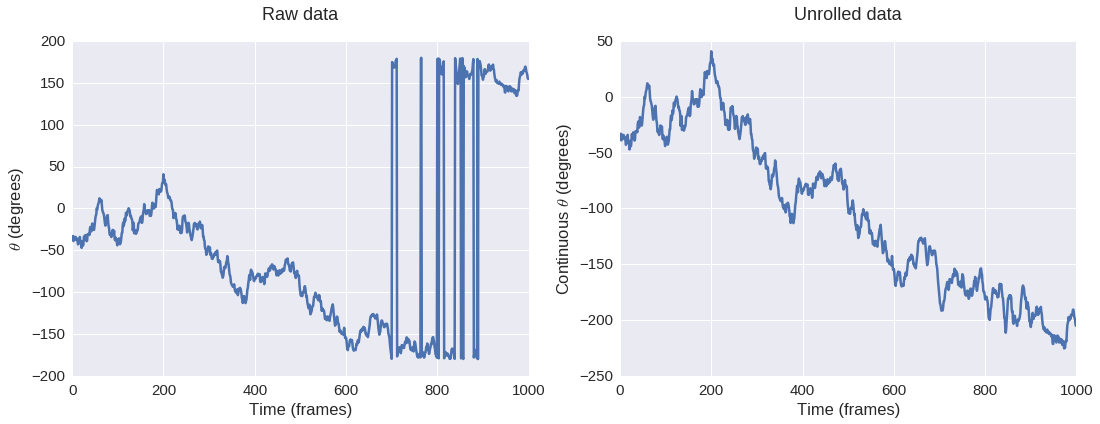

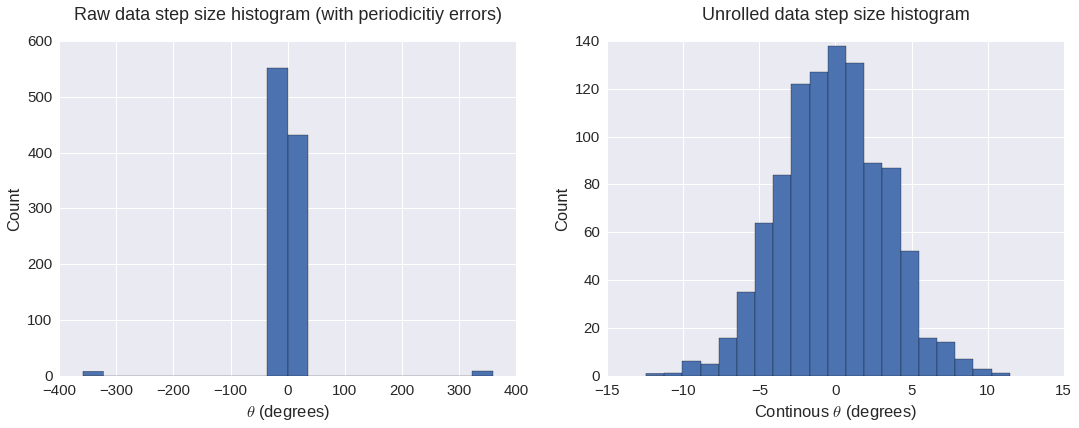

In [255]:
rng = 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.plot(range(len(data[0:rng, 1])), data[0:rng, 1])
ax1.set_title('Raw data', y=1.05)
ax1.set_ylabel(r'$\theta$ (degrees)')
ax1.set_xlabel('Time (frames)')

ax2.plot(range(len(unwrapped_data[0:rng])), unwrapped_data[0:rng, 1])
ax2.set_title('Unrolled data', y=1.05)
ax2.set_ylabel(r'Continuous $\theta$ (degrees)')
ax2.set_xlabel('Time (frames)')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.hist(np.diff(data[0:rng, 1]), bins=20)
ax1.set_title('Raw data step size histogram (with periodicitiy errors)', y=1.05)
ax1.set_ylabel('Count')
ax1.set_xlabel(r'$\theta$ (degrees)')

ax2.hist(np.diff(unwrapped_data[0:rng, 1]), bins=20)
ax2.set_title('Unrolled data step size histogram', y=1.05)
ax2.set_ylabel('Count')
ax2.set_xlabel(r'Continous $\theta$ (degrees)')


In [242]:
unwrapped_positions = unwrapped_data[:, 1]

In [243]:
delays = np.arange(10000, len(unwrapped_positions) - 1, 10000)
MSDs = np.empty((len(delays)))
SEMs = np.empty((len(delays)))
for delay in delays:
    MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)

Computing mean of 4990000 measurements
Computing mean of 4980000 measurements
Computing mean of 4970000 measurements
Computing mean of 4960000 measurements
Computing mean of 4950000 measurements
Computing mean of 4940000 measurements
Computing mean of 4930000 measurements
Computing mean of 4920000 measurements
Computing mean of 4910000 measurements
Computing mean of 4900000 measurements
Computing mean of 4890000 measurements
Computing mean of 4880000 measurements
Computing mean of 4870000 measurements
Computing mean of 4860000 measurements
Computing mean of 4850000 measurements
Computing mean of 4840000 measurements
Computing mean of 4830000 measurements
Computing mean of 4820000 measurements
Computing mean of 4810000 measurements
Computing mean of 4800000 measurements
Computing mean of 4790000 measurements
Computing mean of 4780000 measurements
Computing mean of 4770000 measurements
Computing mean of 4760000 measurements
Computing mean of 4750000 measurements
Computing mean of 4740000

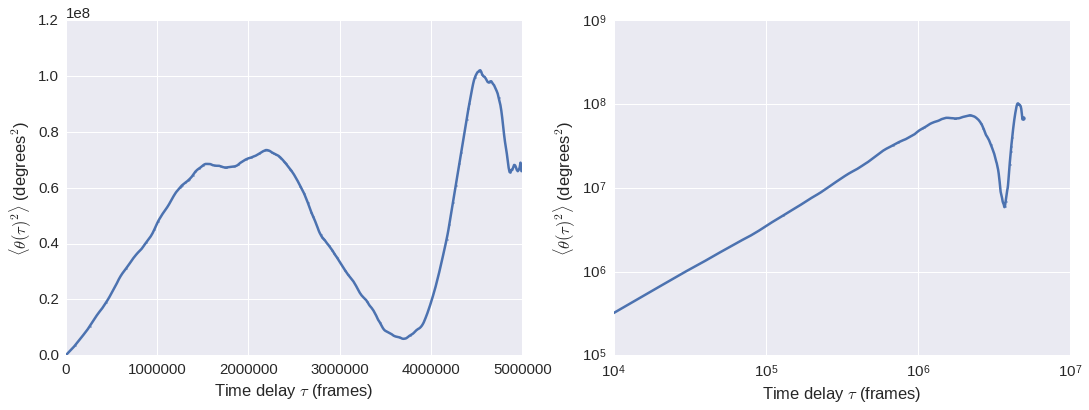

In [245]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays, MSDs, yerr=SEMs)
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (frames)')

ax2.errorbar(delays, MSDs, yerr=SEMs)
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (frames)')
ax2.set_xscale('log')
ax2.set_yscale('log')

In [246]:
ten_percent = 0.1*len(delays)
ninety_percent = 0.9*len(delays)
slope, intercept, r_value, p_value, std_err = stats.linregress(delays[ten_percent:ninety_percent]*10**-14,
                                                               MSDs[ten_percent:ninety_percent])

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [247]:
print(slope)
print(slope/2)

-5.61100568547e+14
-2.80550284274e+14


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


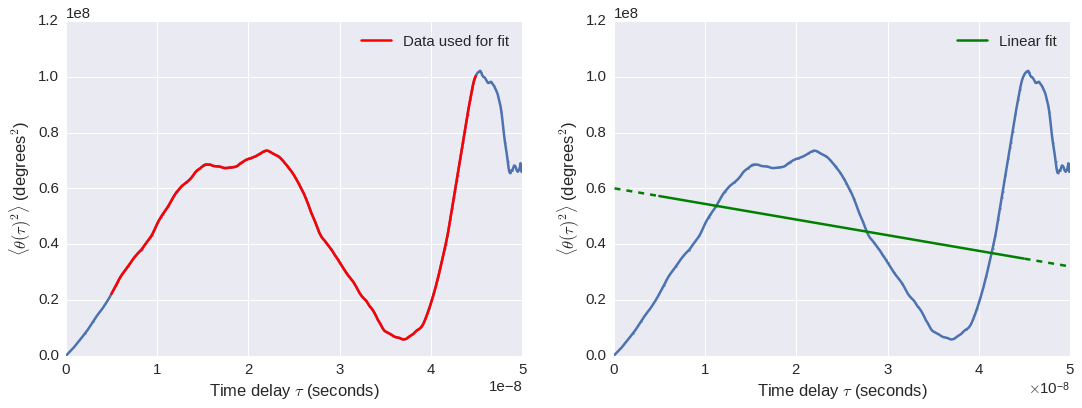

In [248]:
# Femtosecond is 10**-15
# Each frame is 10 fs = 10**-14
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax1.plot(delays[ten_percent:ninety_percent]*10**-14, MSDs[ten_percent:ninety_percent], c='r', label='Data used for fit')
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (seconds)')
ax1.legend()

ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax2.plot(delays[ten_percent:ninety_percent]*10**-14, slope*delays[ten_percent:ninety_percent]*10**-14+intercept, c='g', ls='-', label='Linear fit')
ax2.plot(delays[0:ten_percent]*10**-14, slope*delays[0:ten_percent]*10**-14+intercept, c='g', ls='--')
ax2.plot(delays[ninety_percent:]*10**-14, slope*delays[ninety_percent:]*10**-14+intercept, c='g', ls='--')
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (seconds)')
ax2.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2.xaxis.major.formatter._useMathText = True
ax2.legend()

# Read in the 100 shorter simulations

In [6]:
import os

In [7]:
runs = range(1, 100)
prefix = '/home/dslochower/data/projects/nonequilibrium/'
squared_displacement = np.empty((len(runs)))
end_points = np.empty((len(runs)))
end_positions = 250000

slopes = np.empty((len(runs)))
sems = np.empty((len(runs)))


for run in runs:
    try: 
        print(run)
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/entropy-md-data/'+str(run))
        datum = np.genfromtxt('cccc.dat')
        distances = np.diff(datum[:, 1])
        flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
        flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
        unwrapped_datum = np.copy(datum)
        for subtraction in flips: 
            unwrapped_datum[subtraction + 1:, 1] -= 360
        for addition in flops: 
            unwrapped_datum[addition + 1:, 1] += 360
        unwrapped_positions = unwrapped_datum[:, 1]
        
        delays = np.arange(10000, len(unwrapped_positions) - 1, 10000)
        MSDs = np.empty((len(delays)))
        SEMs = np.empty((len(delays)))
        for delay in delays:
            MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)
            
        times = delays * 10**-14
        slope, intercept, r_value, p_value, std_err = sc.stats.linregress(times, MSDs)
        slopes[run -1] = slope
        sems[run - 1] = std_err
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/entropy-md-data/')
    except Exception as e:
        print(e)
    except:
        squared_displacement[run - 1] = np.nan
        end_points[run - 1] = np.nan


1
name 'compute_msd' is not defined
2
name 'compute_msd' is not defined
3
name 'compute_msd' is not defined
4
name 'compute_msd' is not defined
5
name 'compute_msd' is not defined
6
name 'compute_msd' is not defined
7
name 'compute_msd' is not defined
8
name 'compute_msd' is not defined
9
name 'compute_msd' is not defined
10
name 'compute_msd' is not defined
11
name 'compute_msd' is not defined
12
name 'compute_msd' is not defined
13
name 'compute_msd' is not defined
14
name 'compute_msd' is not defined
15
name 'compute_msd' is not defined
16
name 'compute_msd' is not defined
17
name 'compute_msd' is not defined
18
name 'compute_msd' is not defined
19
name 'compute_msd' is not defined
20
name 'compute_msd' is not defined
21
name 'compute_msd' is not defined
22
name 'compute_msd' is not defined
23
name 'compute_msd' is not defined
24
name 'compute_msd' is not defined
25
name 'compute_msd' is not defined
26
name 'compute_msd' is not defined
27
name 'compute_msd' is not defined
28
name 'c

In [71]:
print('{0:2.2e} +/- {1:2.2e}'.format(np.mean(slopes / 2), np.sqrt(np.sum((sems/2)**2))))

1.81e+15 +/- 1.78e+15


# Same loop as above, but plotting now.

In [8]:
def compute_msd(trajectory, delta):
    ''' For a given time interval, compute the displacements of the angle. For small time deltas,
    there are many displacements in the trajectory. As the delta gets bigger, there are fewer
    and fewer displacements.'''
    number_measurements = len(trajectory) - delta
    print('Computing mean of {} measurements'.format(number_measurements))
    displacements = np.empty((number_measurements))
    for time in range(number_measurements):
        displacements[time] = trajectory[time + delta] - trajectory[time]
    return np.mean(displacements**2), stats.sem(displacements**2)

In [9]:
runs = range(1, 100)
prefix = '/home/dslochower/data/projects/nonequilibrium/'
squared_displacement = np.empty((len(runs)))


delays = np.arange(10000, 100000 - 1, 1000)
all_MSDs = np.empty((len(runs), len(delays)))

for run in runs:
    try: 
        print(run)
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording-v2/'+str(run))
        datum = np.genfromtxt('cccc.dat')
        distances = np.diff(datum[:, 1])
        flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
        flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
        unwrapped_datum = np.copy(datum)

        for subtraction in flips: 
            unwrapped_datum[subtraction + 1:, 1] -= 360
        for addition in flops: 
            unwrapped_datum[addition + 1:, 1] += 360
        unwrapped_positions = unwrapped_datum[:, 1]
        
        MSDs = np.empty((len(delays)))
        SEMs = np.empty((len(delays)))
        for delay in delays:
            MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)
            
        times = delays * 10**-14
        all_MSDs[run - 1] = MSDs
        
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording-v2/'+str(run))
    except Exception as e:
        print(e)
    except:
        squared_displacement[run - 1] = np.nan
        end_points[run - 1] = np.nan


1
Computing mean of 90000 measurements
Computing mean of 89000 measurements
Computing mean of 88000 measurements
Computing mean of 87000 measurements
Computing mean of 86000 measurements
Computing mean of 85000 measurements
Computing mean of 84000 measurements
Computing mean of 83000 measurements
Computing mean of 82000 measurements
Computing mean of 81000 measurements
Computing mean of 80000 measurements
Computing mean of 79000 measurements
Computing mean of 78000 measurements
Computing mean of 77000 measurements
Computing mean of 76000 measurements
Computing mean of 75000 measurements
Computing mean of 74000 measurements
Computing mean of 73000 measurements
Computing mean of 72000 measurements
Computing mean of 71000 measurements
Computing mean of 70000 measurements
Computing mean of 69000 measurements
Computing mean of 68000 measurements
Computing mean of 67000 measurements
Computing mean of 66000 measurements
Computing mean of 65000 measurements
Computing mean of 64000 measurements

In [59]:
std_err

136431.43584050229

4615633.37025


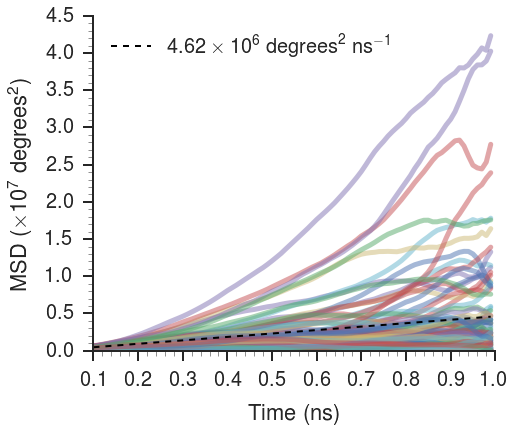

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=(6 * 1.2, 6))
all_slopes = []
for i in all_MSDs:
    ax1.plot(delays * 10**-5, i / 10**7, alpha=0.5)
    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(delays * 10 **-5, i)
    all_slopes.append(slope)
ax1.plot(delays * 10**-5, np.mean(all_slopes)* delays * 10**-5 / 10**7, c='k', lw=2, ls='--', 
         label=r'${0:0.3g} \times 10^{{6}} \text{{ degrees}}^2 \text{{ ns}}^{{-1}}$'.format(np.mean(all_slopes) / 1e6))
ax1.set_ylabel(r'MSD ($\times 10^{7}$ degrees$^2$)')
ax1.set_xlabel(r'Time (ns)')
aesthetics.paper_plot(fig, scientific=False)
ax1.legend(loc=2)
print(np.mean(all_slopes))

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


4562506.07315


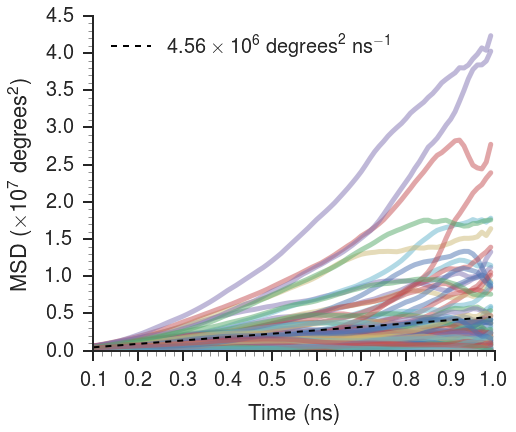

In [46]:
fig, ax1 = plt.subplots(1, 1, figsize=(6 * 1.2, 6))
all_slopes = []
for i in all_MSDs:
    ax1.plot(delays * 10**-5, i / 10**7, alpha=0.5)
    ten_percent = 0.1*len(i)
    ninety_percent = 0.9*len(i)
    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(delays[ten_percent:ninety_percent] * 10 **-5, i[ten_percent:ninety_percent])
    all_slopes.append(slope)
ax1.plot(delays * 10**-5, np.mean(all_slopes)* delays * 10**-5 / 10**7, c='k', lw=2, ls='--', 
         label=r'${0:0.3g} \times 10^{{6}} \text{{ degrees}}^2 \text{{ ns}}^{{-1}}$'.format(np.mean(all_slopes) / 1e6))
ax1.set_ylabel(r'MSD ($\times 10^{7}$ degrees$^2$)')
ax1.set_xlabel(r'Time (ns)')
aesthetics.paper_plot(fig, scientific=False)
ax1.legend(loc=2)
print(np.mean(all_slopes))

In [48]:
all_means = []
all_sems = []
for i in range(len(all_MSDs[0])):
    all_means.append(np.mean(all_MSDs[:, i]))
    all_sems.append(sc.stats.sem(all_MSDs[:, i]))
    

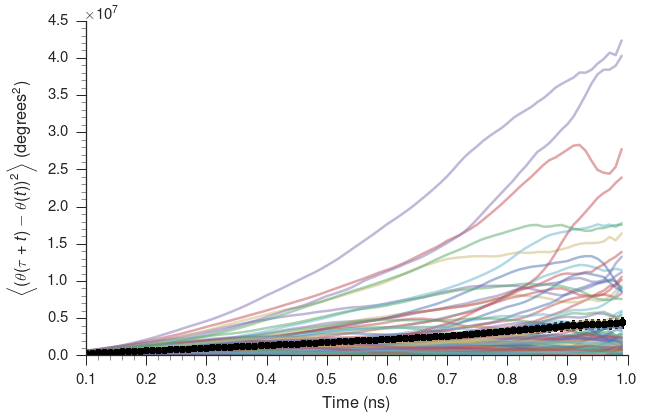

In [54]:
fig, ax1 = plt.subplots(1, 1, figsize=(9.708, 6))
for i in all_MSDs:
    ax1.plot(delays * 10**-5, i, alpha=0.5)
    ax1.errorbar(delays * 10**-5, all_means, all_sems, c='k', fmt='o')
ax1.set_ylabel(r'$\left\langle \left(\theta(\tau + t) - \theta(t) \right) ^2 \right\rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time (ns)')
pretty_plot(fig, scientific=False)

In [56]:
c, stats = np.polynomial.polynomial.polyfit(delays * 10**-5, all_means, w=all_sems, deg=1)

In [57]:
c # c[0], c[2] should be approx. 0, c[1] approx. -1, c[3] approx. 1

-1100900.540629168

In [58]:
stats

5598485.7646721918